In [ ]:
from blobmodel import (
    Model, 
    show_model, 
    BlobFactory,
    Blob,
    AbstractBlobShape,
    BlobShapeImpl,
)
import numpy as np
import xarray as xr
from scipy import signal, integrate
import closedexpressions as ce
import matplotlib.pyplot as plt
import fppanalysis as fpp
from scipy.optimize import curve_fit
import scipy.stats as ss
plt.rcParams['text.usetex'] = True
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
from plasmapy.analysis.time_series.conditional_averaging import (
    ConditionalEvents,
)
import cosmoplots
plt.style.use(["cosmoplots.default"])

# Time series

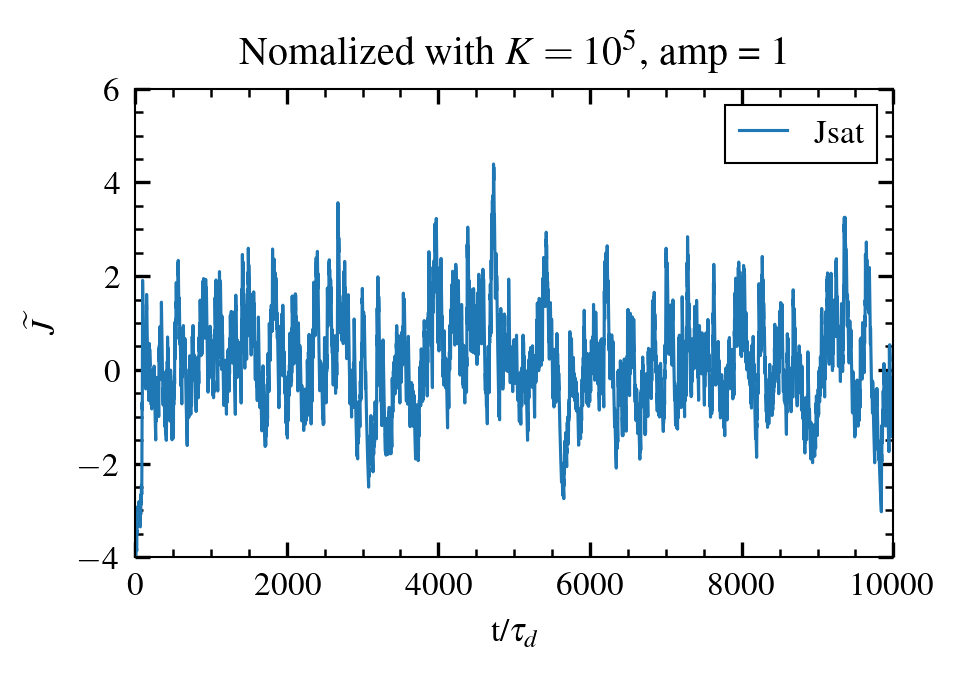

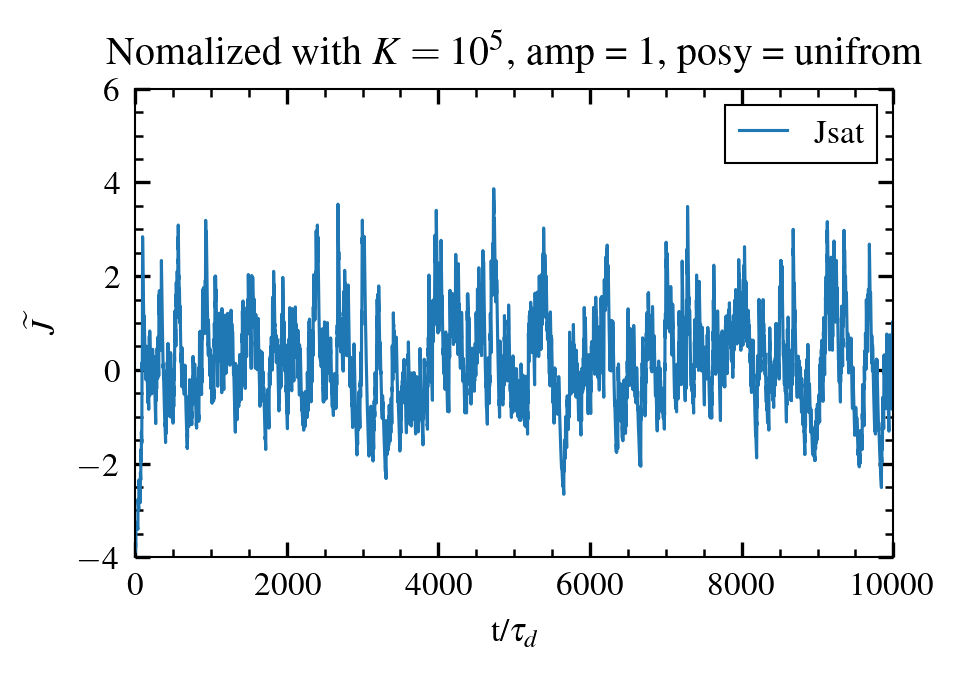

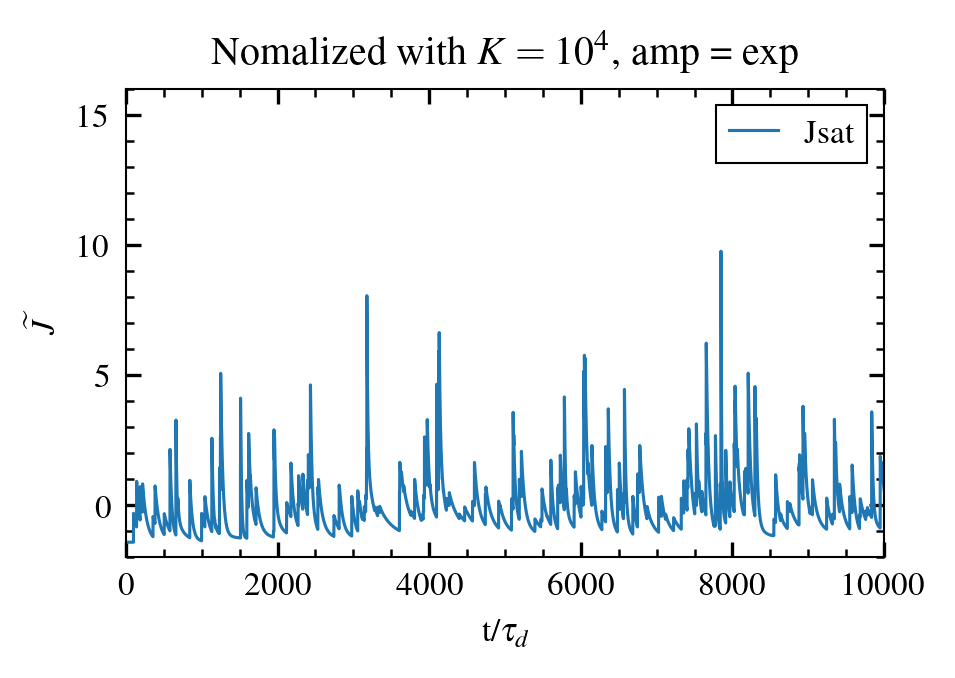

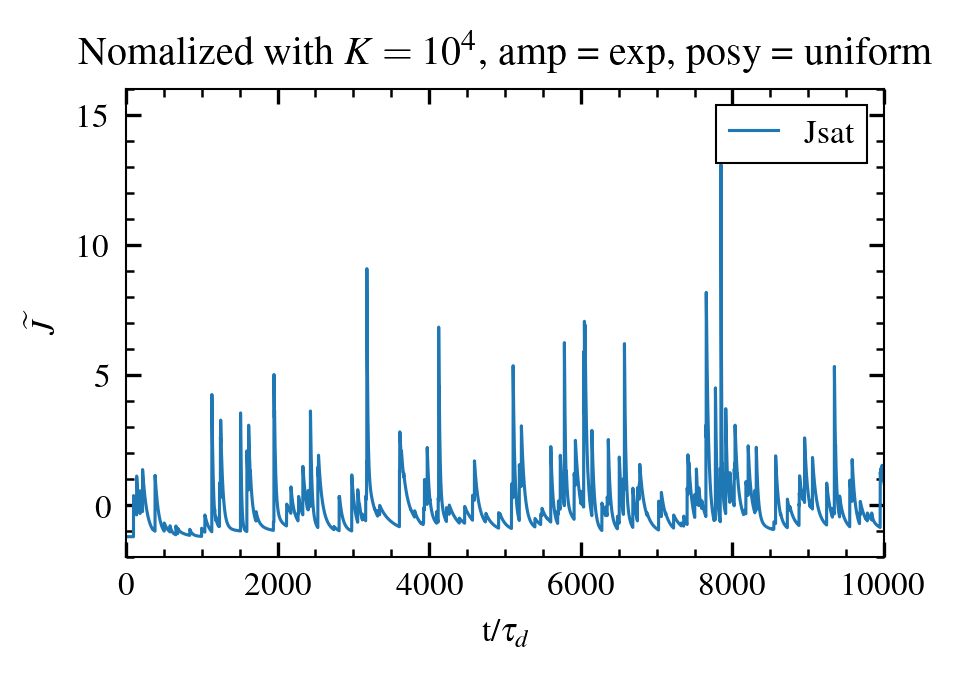

In [539]:
eg_01 = xr.open_dataset("exp_gauss_K1000_T50000_amp1.nc")
eg_1 = xr.open_dataset("exp_gauss_K10000_T50000_amp1.nc")
eg_10 = xr.open_dataset("exp_gauss_K100000_T50000_amp1.nc")

eg_01_posy = xr.open_dataset("exp_gauss_K1000_T50000_amp1_posy.nc")
eg_1_posy = xr.open_dataset("exp_gauss_K10000_T50000_amp1_posy.nc")
eg_10_posy = xr.open_dataset("exp_gauss_K100000_T50000_amp1_posy.nc")

eg_01_exp = xr.open_dataset("exp_gauss_K1000_T50000_amp_exp.nc")
eg_1_exp = xr.open_dataset("exp_gauss_K10000_T50000_amp_exp.nc")
eg_10_exp = xr.open_dataset("exp_gauss_K100000_T50000_amp_exp.nc")

eg_01_exp_posy = xr.open_dataset("exp_gauss_K1000_T50000_amp_exp_posy.nc")
eg_1_exp_posy = xr.open_dataset("exp_gauss_K10000_T50000_amp_exp_posy.nc")
eg_10_exp_posy = xr.open_dataset("exp_gauss_K100000_T50000_amp_exp_posy.nc")

def dataset(eg):
    Jsat = eg["n"].isel(x=0, y=5)
    return Jsat

Jsat_01 = dataset(eg_01)
Jsat_1 = dataset(eg_1)
Jsat_10 = dataset(eg_10)

Jsat_01_norm = (Jsat_01 - np.mean(Jsat_01))/np.sqrt(np.var(Jsat_01))
Jsat_1_norm = (Jsat_1 - np.mean(Jsat_1))/np.sqrt(np.var(Jsat_1))
Jsat_10_norm = (Jsat_10 - np.mean(Jsat_10))/np.sqrt(np.var(Jsat_10))

Jsat_01_posy = dataset(eg_01_posy)
Jsat_1_posy = dataset(eg_1_posy)
Jsat_10_posy = dataset(eg_10_posy)

Jsat_01_posy_norm = (Jsat_01_posy - np.mean(Jsat_01_posy))/np.sqrt(np.var(Jsat_01_posy))
Jsat_1_posy_norm = (Jsat_1_posy - np.mean(Jsat_1_posy))/np.sqrt(np.var(Jsat_1_posy))
Jsat_10_posy_norm = (Jsat_10_posy - np.mean(Jsat_10_posy))/np.sqrt(np.var(Jsat_10_posy))

Jsat_01_exp = dataset(eg_01_exp)
Jsat_1_exp = dataset(eg_1_exp)
Jsat_10_exp = dataset(eg_10_exp)

Jsat_01_exp_norm = (Jsat_01_exp - np.mean(Jsat_01_exp))/np.sqrt(np.var(Jsat_01_exp))
Jsat_1_exp_norm = (Jsat_1_exp - np.mean(Jsat_1_exp))/np.sqrt(np.var(Jsat_1_exp))
Jsat_10_exp_norm = (Jsat_10_exp - np.mean(Jsat_10_exp))/np.sqrt(np.var(Jsat_10_exp))

Jsat_01_exp_posy = dataset(eg_01_exp_posy)
Jsat_1_exp_posy = dataset(eg_1_exp_posy)
Jsat_10_exp_posy = dataset(eg_10_exp_posy)

Jsat_01_exp_posy_norm = (Jsat_01_exp_posy - np.mean(Jsat_01_exp_posy))/np.sqrt(np.var(Jsat_01_exp_posy))
Jsat_1_exp_posy_norm = (Jsat_1_exp_posy - np.mean(Jsat_1_exp_posy))/np.sqrt(np.var(Jsat_1_exp_posy))
Jsat_10_exp_posy_norm = (Jsat_10_exp_posy - np.mean(Jsat_10_exp_posy))/np.sqrt(np.var(Jsat_10_exp_posy))


plt.figure()
plt.plot(Jsat_10_norm, label = 'Jsat')
plt.title(r'Nomalized with $K = 10^5$, amp = 1')
plt.xlabel(r't/$\tau_d$')
plt.ylabel(r'$\widetilde{J}$')
plt.xlim(0, 10000)
plt.ylim(-4, 6)
plt.legend()
plt.show()

plt.figure()
plt.plot(Jsat_10_posy_norm, label = 'Jsat')
plt.title(r'Nomalized with $K = 10^5$, amp = 1, posy = unifrom')
plt.xlabel(r't/$\tau_d$')
plt.ylabel(r'$\widetilde{J}$')
plt.xlim(0, 10000)
plt.ylim(-4, 6)
plt.legend()
plt.show()

plt.figure()
plt.plot(Jsat_1_exp_norm, label = 'Jsat')
plt.title(r'Nomalized with $K = 10^4$, amp = exp')
plt.xlabel(r't/$\tau_d$')
plt.ylabel(r'$\widetilde{J}$')
plt.xlim(0, 10000)
plt.ylim(-2, 16)
plt.legend()
plt.show()

plt.figure()
plt.plot(Jsat_1_exp_posy_norm, label = 'Jsat')
plt.title(r'Nomalized with $K = 10^4$, amp = exp, posy = uniform')
plt.xlabel(r't/$\tau_d$')
plt.ylabel(r'$\widetilde{J}$')
plt.xlim(0, 10000)
plt.ylim(-2, 16)
plt.legend()
plt.show()

# Momenter

In [ ]:
#Moments:
def momenter(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    skew = ss.skew(signal)
    kurtosis = ss.kurtosis(signal)
    return mean, std, skew, kurtosis

mom_Jsat_01 = momenter(Jsat_01_exp_posy_norm)
mom_Jsat_1 = momenter(Jsat_1_exp_posy_norm)
mom_Jsat_10 = momenter(Jsat_10_exp_posy_norm)

print(mom_Jsat_01, mom_Jsat_1, mom_Jsat_10)

In [ ]:
T = 50000
tau_w = []

for i in [1000, 10000, 100000]:
    tau = T / i
    tau_w.append(tau)

print(tau_w)



# Contitional average 

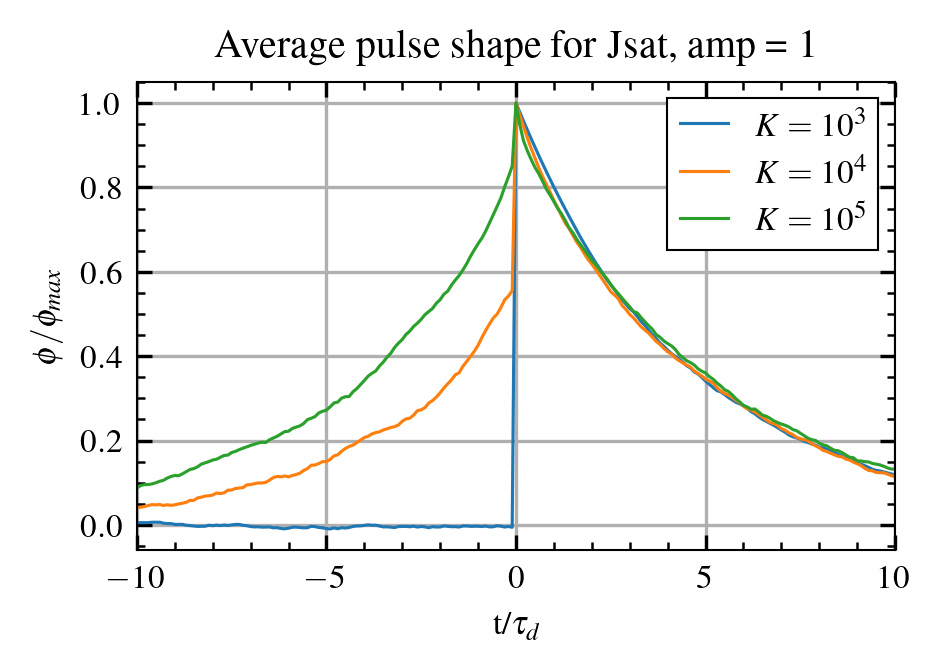

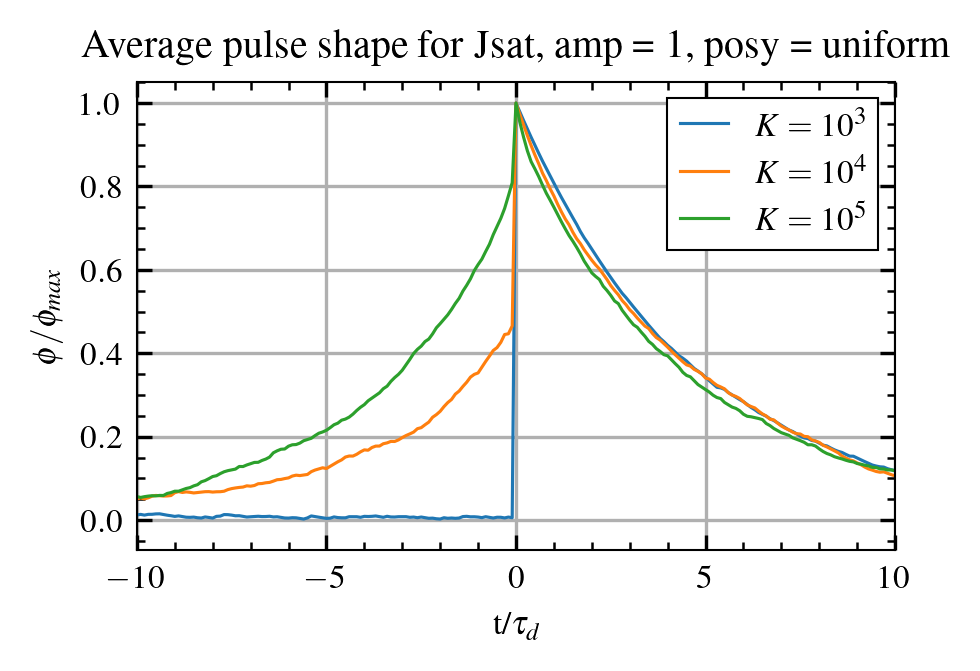

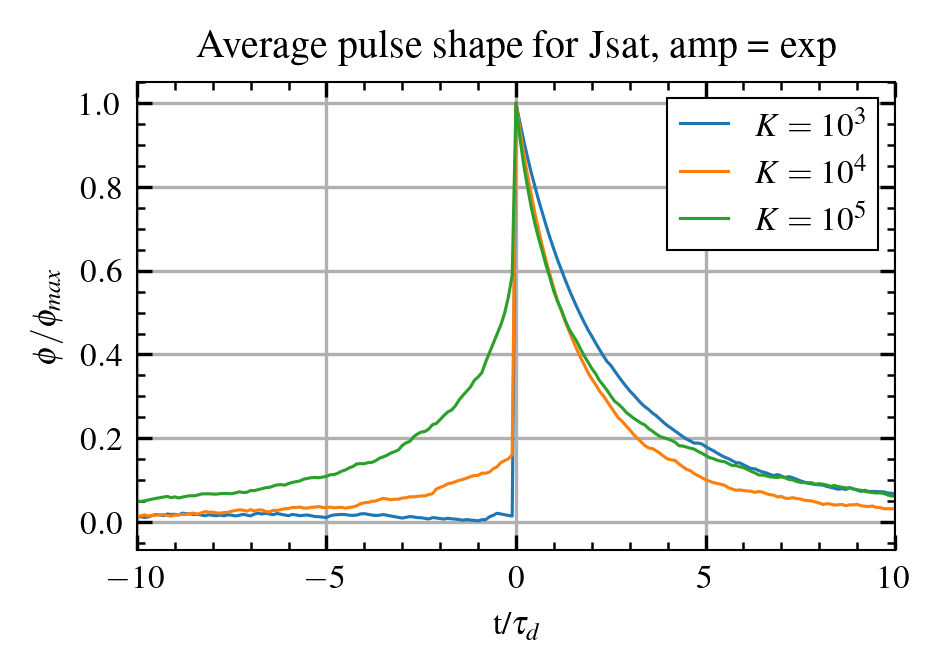

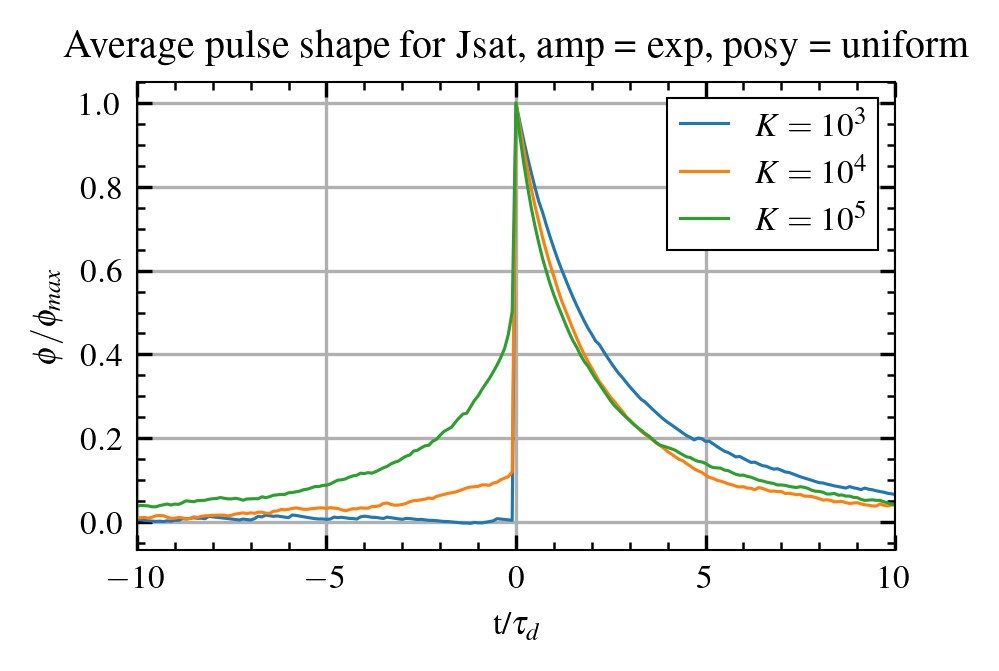

In [561]:
def exp(x):
    return np.exp(x)
    
def gauss(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2)


t = np.linspace(0, 50000, 500000)
x = np.linspace(-10, 10, 500000)

def CE(signal):
    mean = np.mean(signal)
    rms = np.sqrt(np.var(signal))
    low_t = 2.5*rms + mean
    cond_events = ConditionalEvents(signal, t, float(low_t))
    return cond_events

cond_events_01 = CE(Jsat_01_norm)
cond_events_1 = CE(Jsat_1_norm)
cond_events_10 = CE(Jsat_10_norm)

cond_events_01_posy = CE(Jsat_01_posy_norm)
cond_events_1_posy = CE(Jsat_1_posy_norm)
cond_events_10_posy = CE(Jsat_10_posy_norm)

cond_events_01_exp = CE(Jsat_01_exp_norm)
cond_events_1_exp = CE(Jsat_1_exp_norm)
cond_events_10_exp = CE(Jsat_10_exp_norm)

cond_events_01_exp_posy = CE(Jsat_01_exp_posy_norm)
cond_events_1_exp_posy = CE(Jsat_1_exp_posy_norm)
cond_events_10_exp_posy = CE(Jsat_10_exp_posy_norm)

plt.figure()
plt.plot(cond_events_01.time, cond_events_01.average/np.max(cond_events_01.average), label = "$K = 10^3$")
plt.plot(cond_events_1.time, cond_events_1.average/np.max(cond_events_1.average), label = "$K = 10^4$")
plt.plot(cond_events_10.time, cond_events_10.average/np.max(cond_events_10.average), label = "$K = 10^5$")
plt.xlim(-10,10)
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.grid()
plt.title("Average pulse shape for Jsat, amp = 1")
plt.legend()
plt.show()

plt.figure()
plt.plot(cond_events_01_posy.time, cond_events_01_posy.average/np.max(cond_events_01_posy.average), label = "$K = 10^3$")
plt.plot(cond_events_1_posy.time, cond_events_1_posy.average/np.max(cond_events_1_posy.average), label = "$K = 10^4$")
plt.plot(cond_events_10_posy.time, cond_events_10_posy.average/np.max(cond_events_10_posy.average), label = "$K = 10^5$")
plt.xlim(-10,10)
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.grid()
plt.title("Average pulse shape for Jsat, amp = 1, posy = uniform")
plt.legend()
plt.show()

plt.figure()
plt.plot(cond_events_01_exp.time, cond_events_01_exp.average/np.max(cond_events_01_exp.average), label = "$K = 10^3$")
plt.plot(cond_events_1_exp.time, cond_events_1_exp.average/np.max(cond_events_1_exp.average), label = "$K = 10^4$")
plt.plot(cond_events_10_exp.time, cond_events_10_exp.average/np.max(cond_events_10_exp.average), label = "$K = 10^5$")
plt.xlim(-10,10)
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.grid()
plt.title("Average pulse shape for Jsat, amp = exp")
plt.legend()
plt.show()

plt.figure()
plt.plot(cond_events_01_exp_posy.time, cond_events_01_exp_posy.average/np.max(cond_events_01_exp_posy.average), label = "$K = 10^3$")
plt.plot(cond_events_1_exp_posy.time, cond_events_1_exp_posy.average/np.max(cond_events_1_exp_posy.average), label = "$K = 10^4$")
plt.plot(cond_events_10_exp_posy.time, cond_events_10_exp_posy.average/np.max(cond_events_10_exp_posy.average), label = "$K = 10^5$")
plt.xlim(-10,10)
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.grid()
plt.title("Average pulse shape for Jsat, amp = exp, posy = uniform")
plt.legend()
plt.show()

# Probability density function

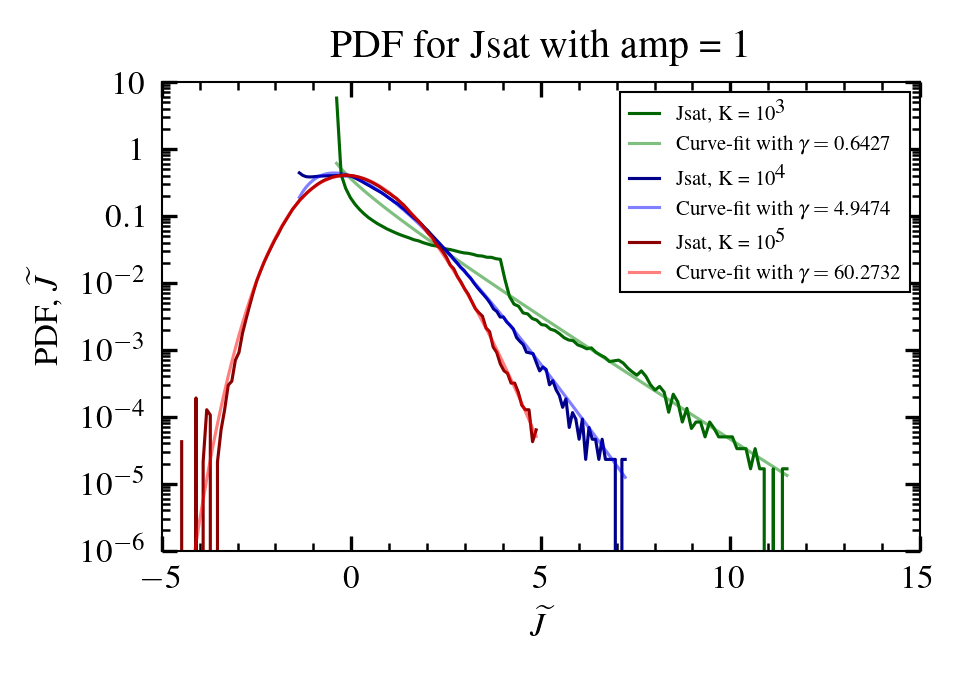

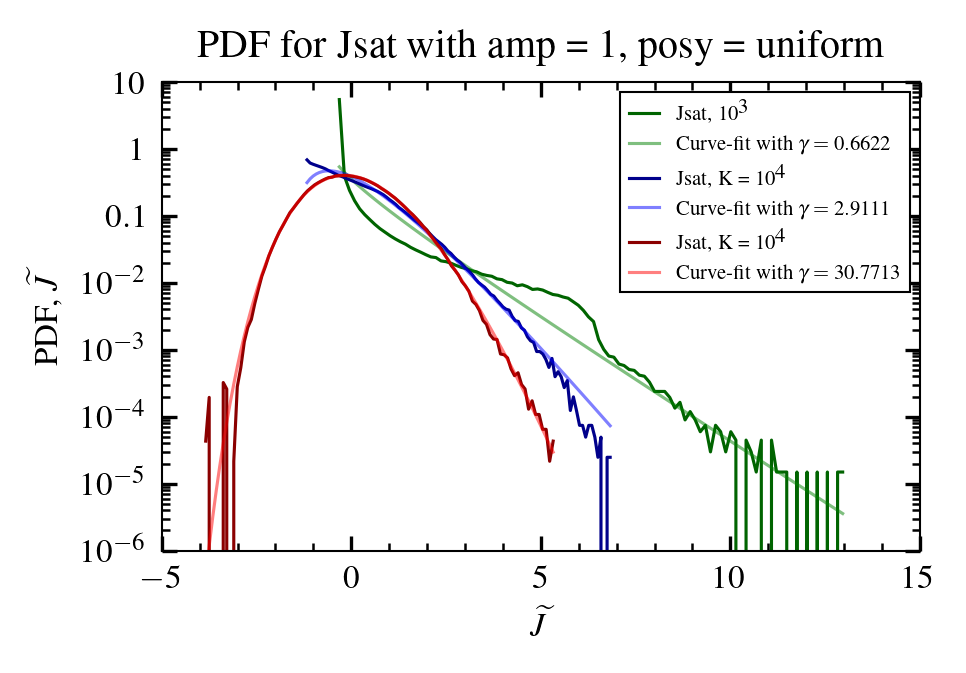

In [565]:
#Probability density function, PDF
def PDF(signal, xmin, xmax):
    x, y = fpp.get_hist(signal, 100)
    good = (x>=xmin)&(x<xmax)&(y>0)
    def fit(x, gamma):
        return np.log(ce.norm_shot_noise_dist(x, gamma))    
    gamma = curve_fit(fit, x[good], np.log(y[good]), p0 = 1, bounds = (0, np.inf))[0][0]
    return x, y, gamma

PDF_Jsat_01 = PDF(Jsat_01_norm, 5, 7.5)
PDF_Jsat_1 = PDF(Jsat_1_norm, 0, 3)
PDF_Jsat_10 = PDF(Jsat_10_norm, 0, 5)

plt.semilogy(PDF_Jsat_01[0], PDF_Jsat_01[1], label = 'Jsat, K = $10^3$', color = 'darkgreen')
plt.semilogy(PDF_Jsat_01[0], ce.norm_shot_noise_dist(PDF_Jsat_01[0], PDF_Jsat_01[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_01[2]))
plt.semilogy(PDF_Jsat_1[0], PDF_Jsat_1[1], label = 'Jsat, K = $10^4$', color = 'darkblue')
plt.semilogy(PDF_Jsat_1[0], ce.norm_shot_noise_dist(PDF_Jsat_1[0], PDF_Jsat_1[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_1[2]))
plt.semilogy(PDF_Jsat_10[0], PDF_Jsat_10[1], label = 'Jsat, K = $10^5$', color = 'darkred')
plt.semilogy(PDF_Jsat_10[0], ce.norm_shot_noise_dist(PDF_Jsat_10[0], PDF_Jsat_10[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_10[2]))
plt.xlabel(r'$\widetilde{J}$')
plt.ylabel(r'PDF, $\widetilde{J}$')
plt.title('PDF for Jsat with amp = 1')
plt.xlim(-5, 15)
plt.ylim(10e-7, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

PDF_Jsat_01_posy = PDF(Jsat_01_posy_norm, 7, 10)
PDF_Jsat_1_posy = PDF(Jsat_1_posy_norm, 0, 3)
PDF_Jsat_10_posy = PDF(Jsat_10_posy_norm, 0, 5)

plt.semilogy(PDF_Jsat_01_posy[0], PDF_Jsat_01_posy[1], label = 'Jsat, $10^3$', color = 'darkgreen')
plt.semilogy(PDF_Jsat_01_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_01_posy[0], PDF_Jsat_01_posy[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_01_posy[2]))
plt.semilogy(PDF_Jsat_1_posy[0], PDF_Jsat_1_posy[1], label = 'Jsat, K = $10^4$', color = 'darkblue')
plt.semilogy(PDF_Jsat_1_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_1_posy[0], PDF_Jsat_1_posy[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_1_posy[2]))
plt.semilogy(PDF_Jsat_10_posy[0], PDF_Jsat_10_posy[1], label = 'Jsat, K = $10^4$', color = 'darkred')
plt.semilogy(PDF_Jsat_10_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_10_posy[0], PDF_Jsat_10_posy[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_10_posy[2]))
plt.xlabel(r'$\widetilde{J}$')
plt.ylabel(r'PDF, $\widetilde{J}$')
plt.title('PDF for Jsat with amp = 1, posy = uniform')
plt.xlim(-5, 15)
plt.ylim(10e-7, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

In [ ]:
PDF_Jsat_01_exp = PDF(Jsat_01_exp_norm, 0, 20)
PDF_Jsat_1_exp = PDF(Jsat_1_exp_norm, 0, 10)
PDF_Jsat_10_exp = PDF(Jsat_10_exp_norm, 0, 5)

plt.semilogy(PDF_Jsat_01_exp[0], PDF_Jsat_01_exp[1], label = 'Jsat, K = $10^3$', color = 'darkgreen')
plt.semilogy(PDF_Jsat_01_exp[0], ce.norm_shot_noise_dist(PDF_Jsat_01_exp[0], PDF_Jsat_01_exp[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_01_exp[2]))
plt.semilogy(PDF_Jsat_1_exp[0], PDF_Jsat_1_exp[1], label = 'Jsat, K = $10^4$', color = 'darkblue')
plt.semilogy(PDF_Jsat_1_exp[0], ce.norm_shot_noise_dist(PDF_Jsat_1_exp[0], PDF_Jsat_1_exp[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_1_exp[2]))
plt.semilogy(PDF_Jsat_10_exp[0], PDF_Jsat_10_exp[1], label = 'Jsat, K = $10^5$', color = 'darkred')
plt.semilogy(PDF_Jsat_10_exp[0], ce.norm_shot_noise_dist(PDF_Jsat_10_exp[0], PDF_Jsat_10_exp[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_10_exp[2]))
plt.xlabel(r'$\widetilde{J}$')
plt.ylabel(r'PDF, $\widetilde{J}$')
plt.title('PDF for Jsat with amp = exp')
plt.xlim(-5, 25)
plt.ylim(10e-6, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

PDF_Jsat_01_exp_posy = PDF(Jsat_01_exp_posy_norm, 0, 20)
PDF_Jsat_1_exp_posy = PDF(Jsat_1_exp_posy_norm, 0, 10)
PDF_Jsat_10_exp_posy = PDF(Jsat_10_exp_posy_norm, 0, 5)

plt.semilogy(PDF_Jsat_01_exp_posy[0], PDF_Jsat_01_exp_posy[1], label = 'Jsat, K = $10^3$', color = 'darkgreen')
plt.semilogy(PDF_Jsat_01_exp_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_01_exp_posy[0], PDF_Jsat_01_exp_posy[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_01_exp_posy[2]))
plt.semilogy(PDF_Jsat_1_exp_posy[0], PDF_Jsat_1_exp_posy[1], label = 'Jsat, K = $10^4$', color = 'darkblue')
plt.semilogy(PDF_Jsat_1_exp_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_1_exp_posy[0], PDF_Jsat_1_exp_posy[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_1_exp_posy[2]))
plt.semilogy(PDF_Jsat_10_exp_posy[0], PDF_Jsat_10_exp_posy[1], label = 'Jsat, K = $10^5$', color = 'darkred')
plt.semilogy(PDF_Jsat_10_exp_posy[0], ce.norm_shot_noise_dist(PDF_Jsat_10_exp_posy[0], PDF_Jsat_10_exp_posy[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_Jsat_10_exp_posy[2]))
plt.xlabel(r'$\widetilde{J}$')
plt.ylabel(r'PDF, $\widetilde{J}$')
plt.title('PDF for Jsat with amp = exp, posy = uniform')
plt.xlim(-5, 25)
plt.ylim(10e-6, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

# Correlation function

In [ ]:
dt = 1/6 #microseconds
def CF(signal, xmin, xmax):
    T, R = fpp.corr_fun(signal, signal, dt, norm = True, biased = False, method = "auto")
    good = (T>=xmin)&(T<xmax)
    td, l = curve_fit(ce.acorr, T[good], R[good], p0 = (1.0, 0.5), bounds = ((0,0), (np.inf, 1)))[0]
    return T, R, td, l, T[good]

CF_01 = CF(Jsat_01_norm, 0, 50)
td_01 = CF_01[2]
l_01 = CF_01[3]

CF_1 = CF(Jsat_1_norm, 0, 50)
td_1 = CF_1[2]
l_1 = CF_1[3]

CF_10 = CF(Jsat_10_norm, 0, 50)
td_10 = CF_10[2]
l_10 = CF_10[3]

plt.plot(CF_01[0], CF_01[1], label = 'Jsat K = 1000', color = 'darkgreen')
plt.plot(CF_01[4], ce.acorr(CF_01[4], CF_01[2], CF_01[3]), color = 'g', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_01[2]) + ', $\lambda = {:.4f}$'.format(CF_01[3]))
plt.plot(CF_1[0], CF_1[1], label = 'Jsat K = 10000', color = 'darkblue')
plt.plot(CF_1[4], ce.acorr(CF_1[4], CF_1[2], CF_1[3]), color = 'b', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_1[2]) + ', $\lambda = {:.4f}$'.format(CF_1[3]))
plt.plot(CF_10[0], CF_10[1], label = 'Jsat K = 10000', color = 'darkred')
plt.plot(CF_10[4], ce.acorr(CF_10[4], CF_10[2], CF_10[3]), color = 'r', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_10[2]) + ', $\lambda = {:.4f}$'.format(CF_10[3]))
plt.title('Correlation function for Jsat, amp = 1')
plt.xlabel(r'$\tau$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend(fontsize = '5')
plt.xlim(-75,100)
plt.ylim(-0.1,1.5)
plt.show()

CF_01_posy = CF(Jsat_01_posy_norm, 0, 50)
td_01_posy = CF_01_posy[2]
l_01_posy = CF_01_posy[3]

CF_1_posy = CF(Jsat_1_posy_norm, 0, 50)
td_1_posy = CF_1_posy[2]
l_1_posy = CF_1_posy[3]

CF_10_posy = CF(Jsat_10_posy_norm, 0, 50)
td_10_posy = CF_10_posy[2]
l_10_posy = CF_10_posy[3]

plt.plot(CF_01_posy[0], CF_01_posy[1], label = 'Jsat K = 1000', color = 'darkgreen')
plt.plot(CF_01_posy[4], ce.acorr(CF_01_posy[4], CF_01_posy[2], CF_01_posy[3]), color = 'g', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_01_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_01_posy[3]))
plt.plot(CF_1_posy[0], CF_1_posy[1], label = 'Jsat K = 10000', color = 'darkblue')
plt.plot(CF_1_posy[4], ce.acorr(CF_1_posy[4], CF_1_posy[2], CF_1_posy[3]), color = 'b', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_1_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_1_posy[3]))
plt.plot(CF_10_posy[0], CF_10_posy[1], label = 'Jsat K = 10000', color = 'darkred')
plt.plot(CF_10_posy[4], ce.acorr(CF_10_posy[4], CF_10_posy[2], CF_10_posy[3]), color = 'r', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_10_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_10_posy[3]))
plt.title('Correlation function for Jsat, amp = 1, posy = uniform')
plt.xlabel(r'$\tau$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend(fontsize = '5')
plt.xlim(-75,100)
plt.ylim(-0.1,1.5)
plt.show()

In [ ]:
CF_01_exp = CF(Jsat_01_exp_norm, 0, 50)
td_01_exp = CF_01_exp[2]
l_01_exp = CF_01_exp[3]

CF_1_exp = CF(Jsat_1_exp_norm, 0, 50)
td_1_exp = CF_1_exp[2]
l_1_exp = CF_1_exp[3]

CF_10_exp = CF(Jsat_10_exp_norm, 0, 50)
td_10_exp = CF_10_exp[2]
l_10_exp = CF_10_exp[3]

plt.plot(CF_01_exp[0], CF_01_exp[1], label = 'Jsat K = 1000', color = 'darkgreen')
plt.plot(CF_01_exp[4], ce.acorr(CF_01_exp[4], CF_01_exp[2], CF_01_exp[3]), color = 'g', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_01_exp[2]) + ', $\lambda = {:.4f}$'.format(CF_01_exp[3]))
plt.plot(CF_1_exp[0], CF_1_exp[1], label = 'Jsat K = 10000', color = 'darkblue')
plt.plot(CF_1_exp[4], ce.acorr(CF_1_exp[4], CF_1_exp[2], CF_1_exp[3]), color = 'b', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_1_exp[2]) + ', $\lambda = {:.4f}$'.format(CF_1_exp[3]))
plt.plot(CF_10_exp[0], CF_10_exp[1], label = 'Jsat K = 10000', color = 'darkred')
plt.plot(CF_10_exp[4], ce.acorr(CF_10_exp[4], CF_10_exp[2], CF_10_exp[3]), color = 'r', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_10_exp[2]) + ', $\lambda = {:.4f}$'.format(CF_10_exp[3]))
plt.title('Correlation function for Jsat, amp = exp')
plt.xlabel(r'$\tau$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend(fontsize = '5')
plt.xlim(-75,100)
plt.ylim(-0.1,1.5)
plt.show()

CF_01_exp_posy = CF(Jsat_01_exp_posy_norm, 0, 50)
td_01_exp_posy = CF_01_exp_posy[2]
l_01_exp_posy = CF_01_exp_posy[3]

CF_1_exp_posy = CF(Jsat_1_exp_posy_norm, 0, 50)
td_1_exp_posy = CF_1_exp_posy[2]
l_1_exp_posy = CF_1_exp_posy[3]

CF_10_exp_posy = CF(Jsat_10_exp_posy_norm, 0, 50)
td_10_exp_posy = CF_10_exp_posy[2]
l_10_exp_posy = CF_10_exp_posy[3]

plt.plot(CF_01_exp_posy[0], CF_01_exp_posy[1], label = 'Jsat K = 1000', color = 'darkgreen')
plt.plot(CF_01_exp_posy[4], ce.acorr(CF_01_exp_posy[4], CF_01_exp_posy[2], CF_01_exp_posy[3]), color = 'g', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_01_exp_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_01_exp_posy[3]))
plt.plot(CF_1_exp_posy[0], CF_1_exp_posy[1], label = 'Jsat K = 10000', color = 'darkblue')
plt.plot(CF_1_exp_posy[4], ce.acorr(CF_1_exp_posy[4], CF_1_exp_posy[2], CF_1_exp_posy[3]), color = 'b', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_1_exp_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_1_exp_posy[3]))
plt.plot(CF_10_exp_posy[0], CF_10_exp_posy[1], label = 'Jsat K = 10000', color = 'darkred')
plt.plot(CF_10_exp_posy[4], ce.acorr(CF_10_exp_posy[4], CF_10_exp_posy[2], CF_10_exp_posy[3]), color = 'r', 
         label = r'Curve-fit with $\tau_d = {:.4f}$'.format(CF_10_exp_posy[2]) + ', $\lambda = {:.4f}$'.format(CF_10_exp_posy[3]))
plt.title('Correlation function for Jsat, amp = exp, posy = uniform')
plt.xlabel(r'$\tau$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend(fontsize = '5')
plt.xlim(-75,100)
plt.ylim(-0.1,1.5)
plt.show()

# Power Spectral Density

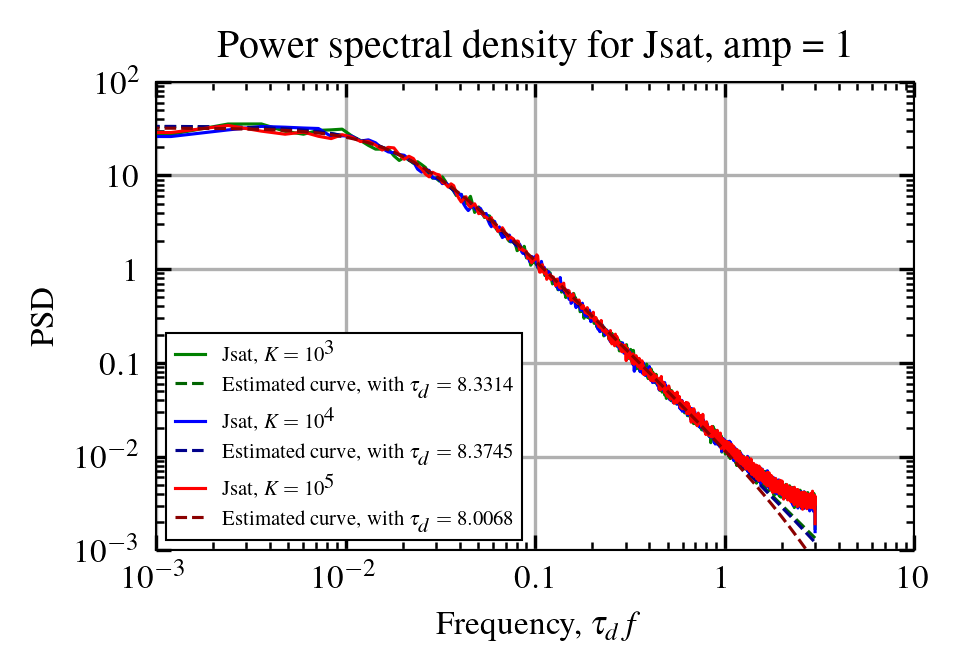

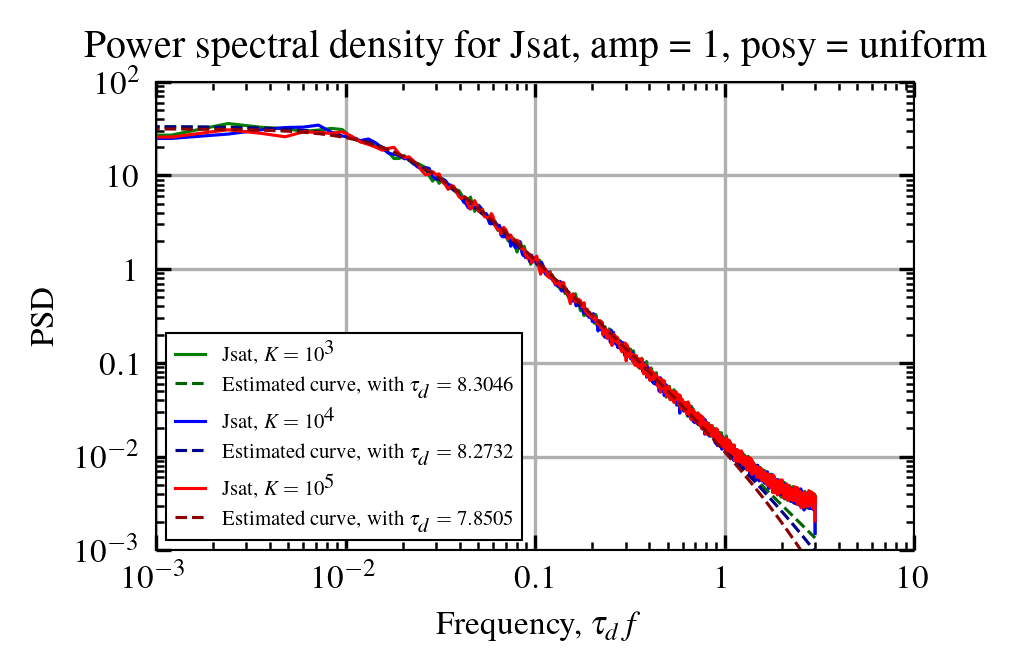

In [558]:
#Power spectral density
def PSD(sig, td, l):
    freq, psd = signal.welch(sig, fs=1/dt, nperseg = sig.size/100)
    omega = 2*np.pi*freq
    good = (freq>1E-6)&(freq<1)
    #use the estimated values for time duration and lambda from the correlation function
    a_psd = ce.psd(omega, td, l)
    return freq, psd, a_psd

PSD_01 = PSD(Jsat_01_norm, td_01, l_01)
PSD_1 = PSD(Jsat_1_norm, td_1, l_1)
PSD_10 = PSD(Jsat_10_norm, td_10, l_10)

plt.figure()
plt.loglog(PSD_01[0], PSD_01[1], label = r'Jsat, $K = 10^3$', color = 'g')
plt.plot(PSD_01[0], PSD_01[2], '--', label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_01), color = 'darkgreen')
plt.loglog(PSD_1[0], PSD_1[1], label = r'Jsat, $K = 10^4$', color = 'b')
plt.plot(PSD_1[0], PSD_1[2], '--',label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_1), color = 'darkblue')
plt.loglog(PSD_10[0], PSD_10[1], label = r'Jsat, $K = 10^5$', color = 'r')
plt.plot(PSD_10[0], PSD_10[2], '--',label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_10), color = 'darkred')
plt.xlabel(r'Frequency, $\tau_df$')
plt.ylabel('PSD')
plt.title("Power spectral density for Jsat, amp  = 1")
plt.grid()
plt.xlim(10e-4, 10)
plt.ylim(10e-4, 10e1)
plt.legend(fontsize = '5')
plt.show()

PSD_01_posy = PSD(Jsat_01_posy_norm, td_01_posy, l_01_posy)
PSD_1_posy = PSD(Jsat_1_posy_norm, td_1_posy, l_1_posy)
PSD_10_posy = PSD(Jsat_10_posy_norm, td_10_posy, l_10_posy)

plt.figure()
plt.loglog(PSD_01_posy[0], PSD_01_posy[1], label = r'Jsat, $K = 10^3$', color = 'g')
plt.plot(PSD_01_posy[0], PSD_01_posy[2], '--', label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_01_posy), color = 'darkgreen')
plt.loglog(PSD_1_posy[0], PSD_1_posy[1], label = r'Jsat, $K = 10^4$', color = 'b')
plt.plot(PSD_1_posy[0], PSD_1_posy[2], '--',label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_1_posy), color = 'darkblue')
plt.loglog(PSD_10_posy[0], PSD_10_posy[1], label = r'Jsat, $K = 10^5$', color = 'r')
plt.plot(PSD_10_posy[0], PSD_10_posy[2], '--',label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_10_posy), color = 'darkred')
plt.xlabel(r'Frequency, $\tau_df$')
plt.ylabel('PSD')
plt.title("Power spectral density for Jsat, amp  = 1, posy = uniform")
plt.grid()
plt.xlim(10e-4, 10)
plt.ylim(10e-4, 10e1)
plt.legend(fontsize = '5')
plt.show()

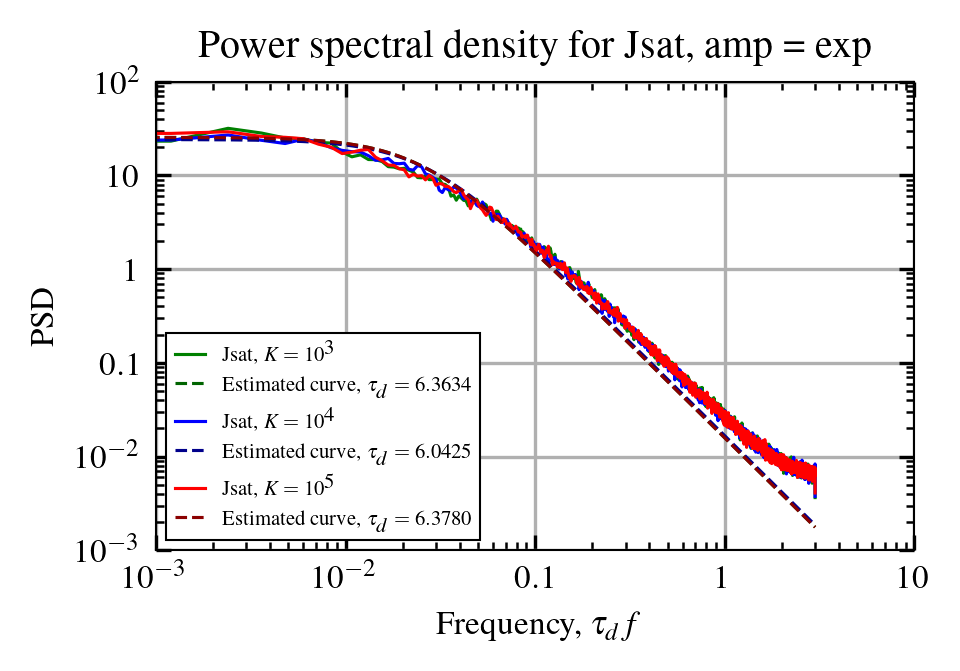

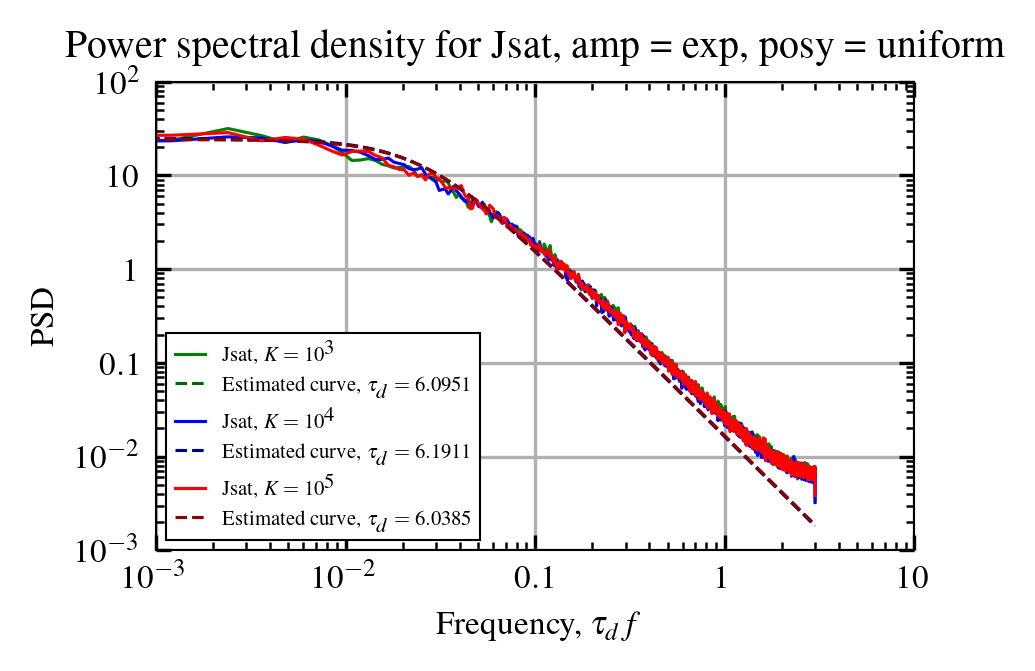

In [560]:
PSD_01_exp = PSD(Jsat_01_exp_norm, td_01_exp, l_01_exp)
PSD_1_exp = PSD(Jsat_1_exp_norm, td_1_exp, l_1_exp)
PSD_10_exp = PSD(Jsat_10_exp_norm, td_10_exp, l_10_exp)

plt.figure()
plt.loglog(PSD_01_exp[0], PSD_01_exp[1], label = r'Jsat, $K = 10^3$', color = 'g')
plt.plot(PSD_01_exp[0], PSD_01_exp[2], '--', label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_01_exp), color = 'darkgreen')
plt.loglog(PSD_1_exp[0], PSD_1_exp[1], label = r'Jsat, $K = 10^4$', color = 'b')
plt.plot(PSD_1_exp[0], PSD_1_exp[2], '--',label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_1_exp), color = 'darkblue')
plt.loglog(PSD_10_exp[0], PSD_10_exp[1], label = r'Jsat, $K = 10^5$', color = 'r')
plt.plot(PSD_10_exp[0], PSD_10_exp[2], '--',label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_10_exp), color = 'darkred')
plt.xlabel(r'Frequency, $\tau_df$')
plt.ylabel('PSD')
plt.title("Power spectral density for Jsat, amp = exp")
plt.grid()
plt.xlim(10e-4, 10)
plt.ylim(10e-4, 10e1)
plt.legend(fontsize = '5')
plt.show()

PSD_01_exp_posy = PSD(Jsat_01_exp_posy_norm, td_01_exp_posy, l_01_exp_posy)
PSD_1_exp_posy = PSD(Jsat_1_exp_posy_norm, td_1_exp_posy, l_1_exp_posy)
PSD_10_exp_posy = PSD(Jsat_10_exp_posy_norm, td_10_exp_posy, l_10_exp_posy)

plt.figure()
plt.loglog(PSD_01_exp_posy[0], PSD_01_exp_posy[1], label = r'Jsat, $K = 10^3$', color = 'g')
plt.plot(PSD_01_exp_posy[0], PSD_01_exp_posy[2], '--', label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_01_exp_posy), color = 'darkgreen')
plt.loglog(PSD_1_exp_posy[0], PSD_1_exp_posy[1], label = r'Jsat, $K = 10^4$', color = 'b')
plt.plot(PSD_1_exp_posy[0], PSD_1_exp_posy[2], '--',label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_1_exp_posy), color = 'darkblue')
plt.loglog(PSD_10_exp_posy[0], PSD_10_exp_posy[1], label = r'Jsat, $K = 10^5$', color = 'r')
plt.plot(PSD_10_exp_posy[0], PSD_10_exp_posy[2], '--',label = r"Estimated curve, $\tau_d = {:.4f}$".format(td_10_exp_posy), color = 'darkred')
plt.xlabel(r'Frequency, $\tau_df$')
plt.ylabel('PSD')
plt.title("Power spectral density for Jsat, amp = exp, posy = uniform")
plt.grid()
plt.xlim(10e-4, 10)
plt.ylim(10e-4, 10e1)
plt.legend(fontsize = '5')
plt.show()

# Waiting time

In [ ]:
def exp_func(x, lamb):
    return lamb*np.exp(-lamb*x)

def PDF_WT(cond_events, xmin, xmax):
    P_u, bins_u = np.histogram(cond_events.waiting_times, 16, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    good = (bin_center_u>=xmin)&(bin_center_u<xmax)&(P_u>0)
    def fit(bin_center_u, tau_w):
        return np.log(exp_func(bin_center_u, tau_w))
    tau_w = curve_fit(fit, bin_center_u[good], np.log(P_u[good]), p0 = 0.01, bounds=(0, np.inf))[0][0]
    return P_u, bin_center_u, tau_w

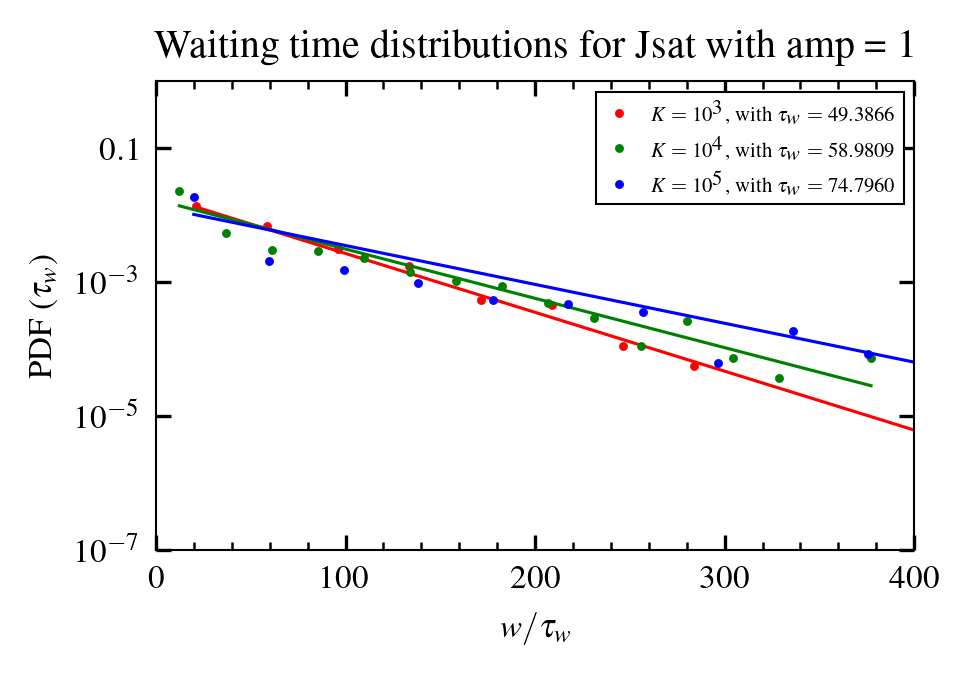

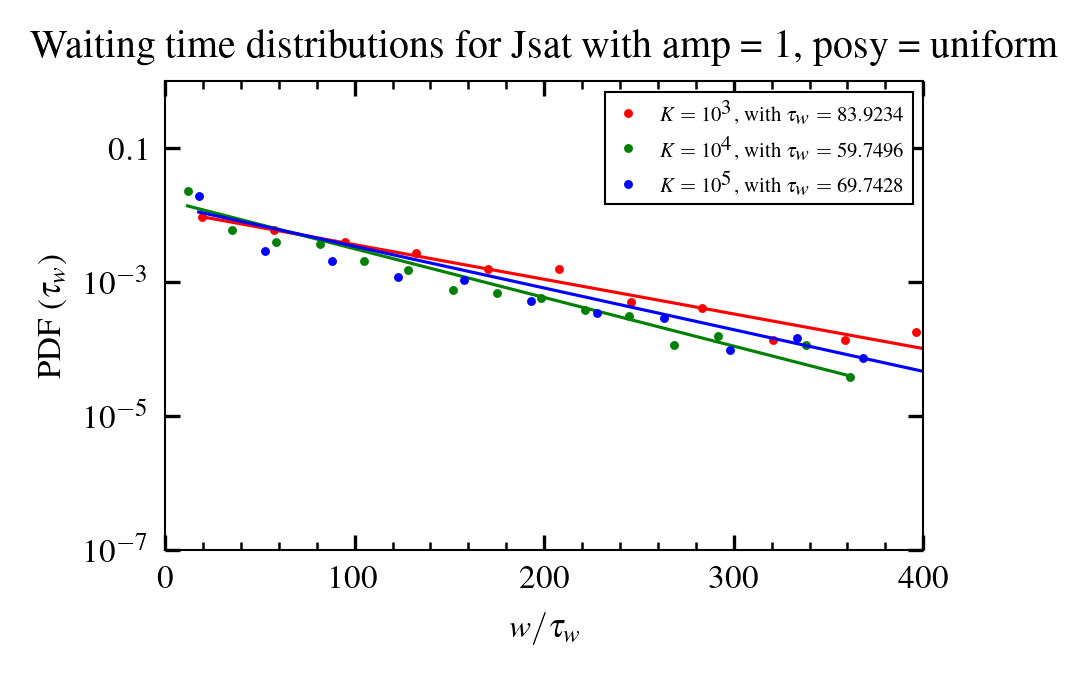

In [550]:
PDF_WT_01 = PDF_WT(cond_events_01, 0, 500)
PDF_WT_1 = PDF_WT(cond_events_1, 0, 500)
PDF_WT_10 = PDF_WT(cond_events_10, 0, 500)

plt.figure()
plt.semilogy(PDF_WT_01[1], PDF_WT_01[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01[2]), color = 'red')
plt.plot(PDF_WT_01[1], exp_func(PDF_WT_01[1], PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_1[1], PDF_WT_1[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1[2]), color = 'green')
plt.plot(PDF_WT_1[1], exp_func(PDF_WT_1[1], PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_10[1], PDF_WT_10[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10[2]), color = 'blue')
plt.plot(PDF_WT_10[1], exp_func(PDF_WT_10[1], PDF_WT_10[2]), color = 'blue')
plt.title('Waiting time distributions for Jsat with amp = 1')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0,400)
plt.ylim(10e-8, 10e-1)
plt.xlabel(r'$w/\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

PDF_WT_01 = PDF_WT(cond_events_01_posy, 0, 500)
PDF_WT_1 = PDF_WT(cond_events_1_posy, 0, 500)
PDF_WT_10 = PDF_WT(cond_events_10_posy, 0, 500)

plt.figure()
plt.semilogy(PDF_WT_01[1], PDF_WT_01[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01[2]), color = 'red')
plt.plot(PDF_WT_01[1], exp_func(PDF_WT_01[1], PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_1[1], PDF_WT_1[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1[2]), color = 'green')
plt.plot(PDF_WT_1[1], exp_func(PDF_WT_1[1], PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_10[1], PDF_WT_10[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10[2]), color = 'blue')
plt.plot(PDF_WT_10[1], exp_func(PDF_WT_10[1], PDF_WT_10[2]), color = 'blue')
plt.title('Waiting time distributions for Jsat with amp = 1, posy = uniform')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0,400)
plt.ylim(10e-8, 10e-1)
plt.xlabel(r'$w/\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

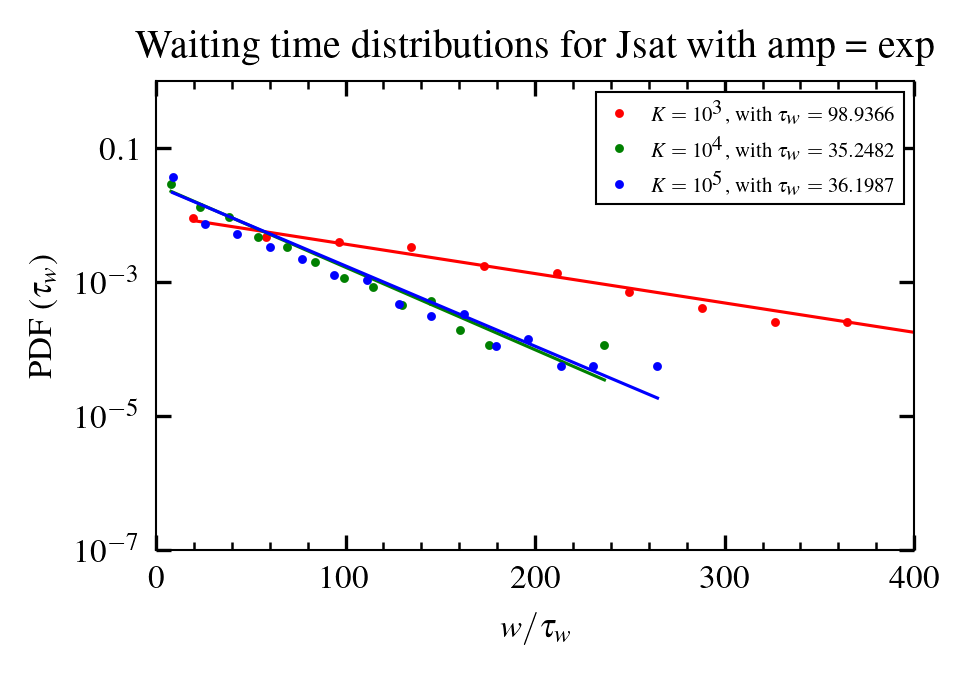

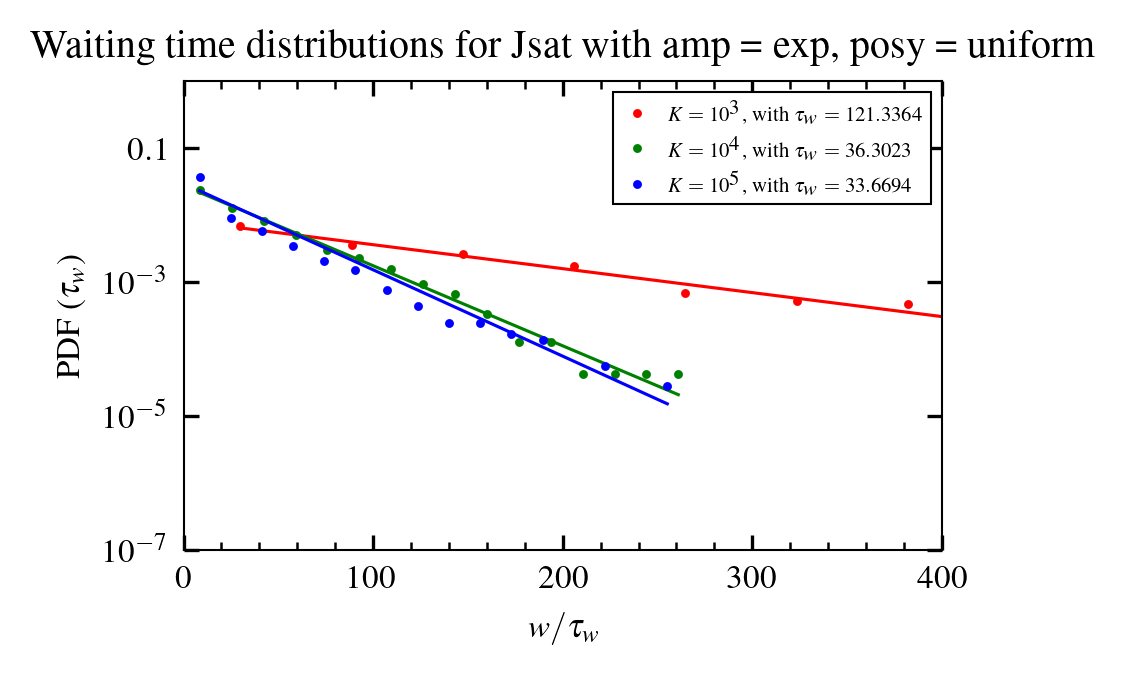

In [553]:
PDF_WT_01 = PDF_WT(cond_events_01_exp, 0, 500)
PDF_WT_1 = PDF_WT(cond_events_1_exp, 0, 500)
PDF_WT_10 = PDF_WT(cond_events_10_exp, 0, 500)

plt.figure()
plt.semilogy(PDF_WT_01[1], PDF_WT_01[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_01[1], exp_func(PDF_WT_01[1], PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_1[1], PDF_WT_1[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_1[1], exp_func(PDF_WT_1[1], PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_10[1], PDF_WT_10[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10[2]), color = 'blue')
plt.semilogy(PDF_WT_10[1], exp_func(PDF_WT_10[1], PDF_WT_10[2]), color = 'blue')
plt.title('Waiting time distributions for Jsat with amp = exp')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0,400)
plt.ylim(10e-8, 10e-1)
plt.xlabel(r'$w/\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

PDF_WT_01 = PDF_WT(cond_events_01_exp_posy, 0, 500)
PDF_WT_1 = PDF_WT(cond_events_1_exp_posy, 0, 500)
PDF_WT_10 = PDF_WT(cond_events_10_exp_posy, 0, 500)

plt.figure()
plt.semilogy(PDF_WT_01[1], PDF_WT_01[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01[2]), color = 'red')
plt.plot(PDF_WT_01[1], exp_func(PDF_WT_01[1], PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_1[1], PDF_WT_1[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1[2]), color = 'green')
plt.plot(PDF_WT_1[1], exp_func(PDF_WT_1[1], PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_10[1], PDF_WT_10[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10[2]), color = 'blue')
plt.plot(PDF_WT_10[1], exp_func(PDF_WT_10[1], PDF_WT_10[2]), color = 'blue')
plt.title('Waiting time distributions for Jsat with amp = exp, posy = uniform')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0,400)
plt.ylim(10e-8, 10e-1)
plt.xlabel(r'$w/\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

# Amplitude distribution

In [554]:
def PDF_exp(x, lamb):
    return lamb*np.exp(-lamb*(x-2.5))

def PDF_A(cond_events, xmin, xmax):
    P_u, bins_u = np.histogram(cond_events.peaks, 8, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    good = (bin_center_u>=xmin)&(bin_center_u<xmax)&(P_u>0)
    def fit(bin_center_u, A):
        return np.log(PDF_exp(bin_center_u, A))
    A = curve_fit(fit, bin_center_u[good], np.log(P_u[good]), p0 = 1
                  , bounds=(0, np.inf))[0][0]
    return P_u, bin_center_u, A

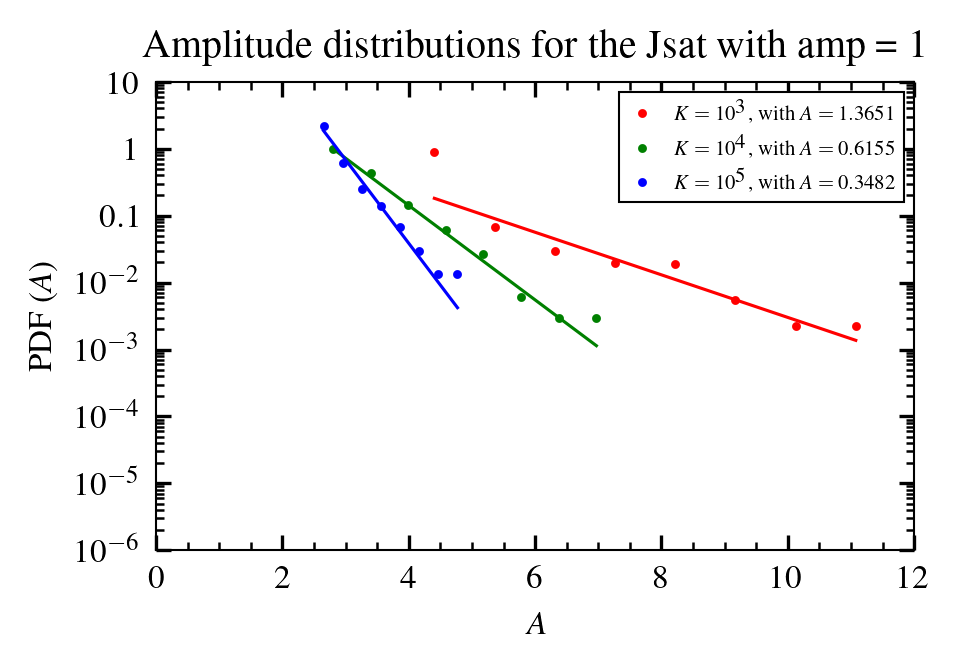

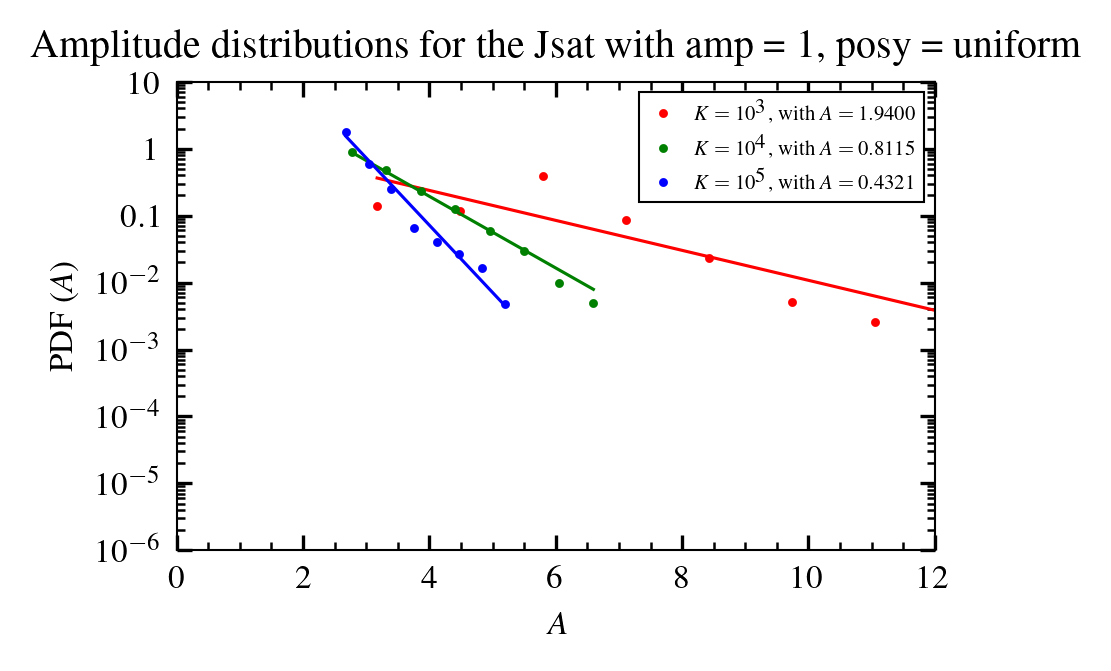

In [564]:
PDF_A_01 = PDF_A(cond_events_01, 4, 11)
PDF_A_1 = PDF_A(cond_events_1, 2, 6)
PDF_A_10 = PDF_A(cond_events_10, 2, 4)

plt.figure()
plt.semilogy(PDF_A_01[1], PDF_A_01[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01[2]), color = 'red')
plt.plot(PDF_A_01[1], PDF_exp(PDF_A_01[1], PDF_A_01[2]), color = 'red')
plt.semilogy(PDF_A_1[1], PDF_A_1[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1[2]), color = 'green')
plt.plot(PDF_A_1[1], PDF_exp(PDF_A_1[1], PDF_A_1[2]), color = 'green')
plt.semilogy(PDF_A_10[1], PDF_A_10[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10[2]), color = 'blue')
plt.plot(PDF_A_10[1], PDF_exp(PDF_A_10[1], PDF_A_10[2]), color = 'blue')
plt.legend(fontsize = '5')
plt.xlim(0,12)
plt.ylim(10e-7, 10)
plt.title('Amplitude distributions for the Jsat with amp = 1')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_posy = PDF_A(cond_events_01_posy, 3, 11)
PDF_A_1_posy = PDF_A(cond_events_1_posy, 2, 6)
PDF_A_10_posy = PDF_A(cond_events_10_posy, 2, 5)

plt.figure()
plt.semilogy(PDF_A_01_posy[1], PDF_A_01_posy[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_posy[2]), color = 'red')
plt.plot(PDF_A_01_posy[1], PDF_exp(PDF_A_01_posy[1], PDF_A_01_posy[2]), color = 'red')
plt.semilogy(PDF_A_1_posy[1], PDF_A_1_posy[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_posy[2]), color = 'green')
plt.plot(PDF_A_1_posy[1], PDF_exp(PDF_A_1_posy[1], PDF_A_1_posy[2]), color = 'green')
plt.semilogy(PDF_A_10_posy[1], PDF_A_10_posy[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_posy[2]), color = 'blue')
plt.plot(PDF_A_10_posy[1], PDF_exp(PDF_A_10_posy[1], PDF_A_10_posy[2]), color = 'blue')
plt.legend(fontsize = '5')
plt.xlim(0,12)
plt.ylim(10e-7, 10)
plt.title('Amplitude distributions for the Jsat with amp = 1, posy = uniform')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

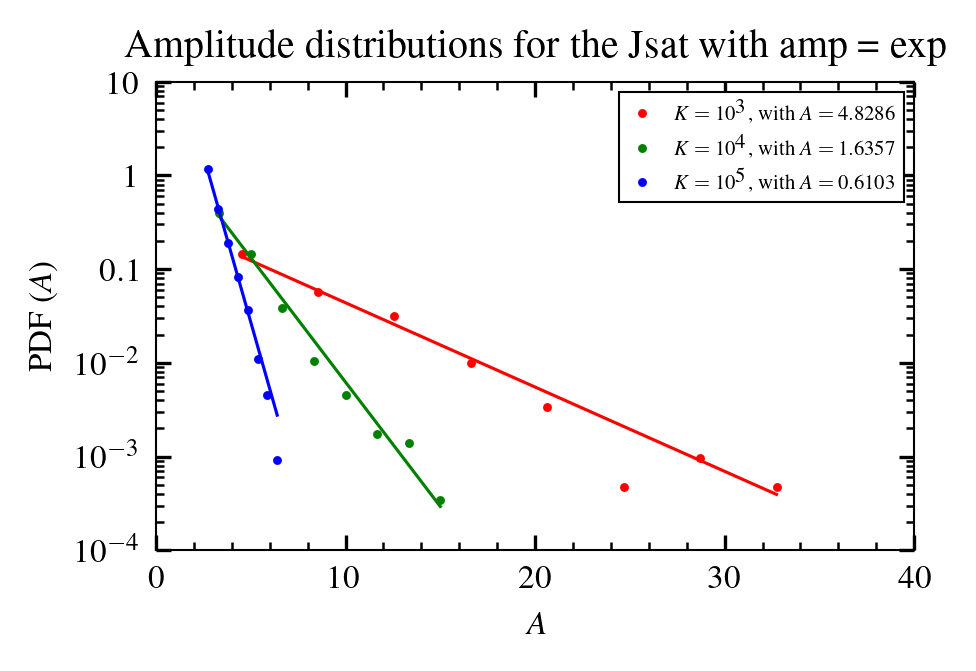

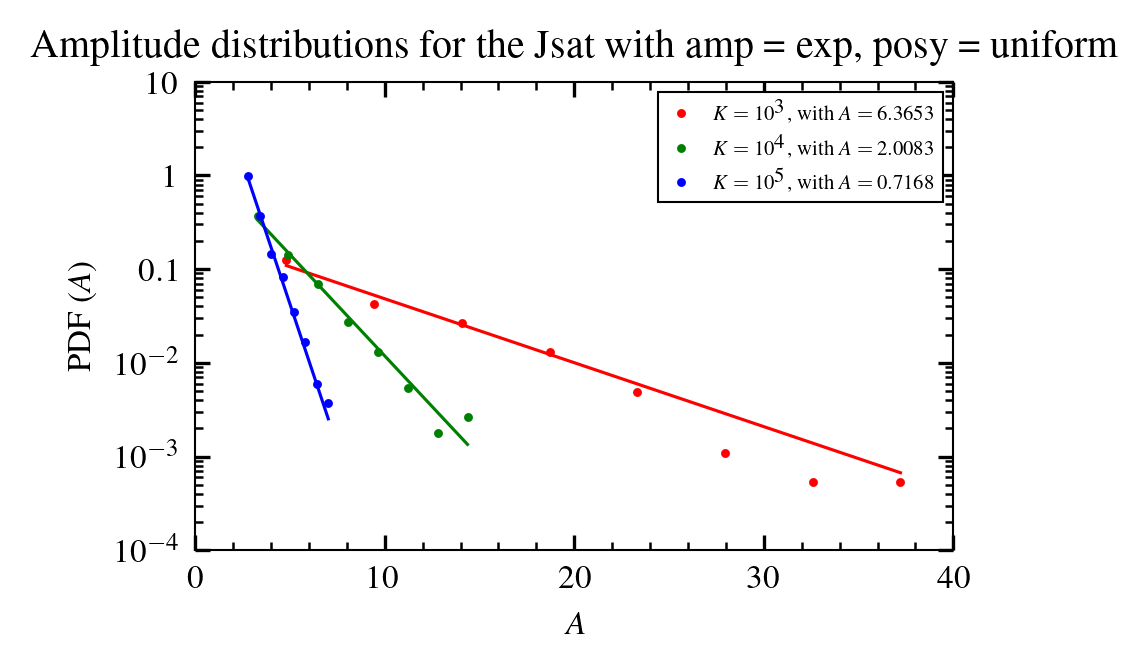

In [563]:
PDF_A_01_exp = PDF_A(cond_events_01_exp, 0, 20)
PDF_A_1_exp = PDF_A(cond_events_1_exp, 0, 15)
PDF_A_10_exp = PDF_A(cond_events_10_exp, 0, 5)

plt.figure()
plt.semilogy(PDF_A_01_exp[1], PDF_A_01_exp[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp[2]), color = 'red')
plt.plot(PDF_A_01_exp[1], PDF_exp(PDF_A_01_exp[1], PDF_A_01_exp[2]), color = 'red')
plt.semilogy(PDF_A_1_exp[1], PDF_A_1_exp[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp[2]), color = 'green')
plt.plot(PDF_A_1_exp[1], PDF_exp(PDF_A_1_exp[1], PDF_A_1_exp[2]), color = 'green')
plt.semilogy(PDF_A_10_exp[1], PDF_A_10_exp[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp[2]), color = 'blue')
plt.plot(PDF_A_10_exp[1], PDF_exp(PDF_A_10_exp[1], PDF_A_10_exp[2]), color = 'blue')
plt.legend(fontsize = '5')
plt.xlim(0,40)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the Jsat with amp = exp')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_exp_posy = PDF_A(cond_events_01_exp_posy, 0, 20)
PDF_A_1_exp_posy = PDF_A(cond_events_1_exp_posy, 0, 15)
PDF_A_10_exp_posy = PDF_A(cond_events_10_exp_posy, 0, 5)

plt.figure()
plt.semilogy(PDF_A_01_exp_posy[1], PDF_A_01_exp_posy[0], '.', 
             label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp_posy[2]), color = 'red')
plt.plot(PDF_A_01_exp_posy[1], PDF_exp(PDF_A_01_exp_posy[1], PDF_A_01_exp_posy[2]), color = 'red')
plt.semilogy(PDF_A_1_exp_posy[1], PDF_A_1_exp_posy[0], '.', 
             label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp_posy[2]), color = 'green')
plt.plot(PDF_A_1_exp_posy[1], PDF_exp(PDF_A_1_exp_posy[1], PDF_A_1_exp_posy[2]), color = 'green')
plt.semilogy(PDF_A_10_exp_posy[1], PDF_A_10_exp_posy[0], '.', 
             label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp_posy[2]), color = 'blue')
plt.plot(PDF_A_10_exp_posy[1], PDF_exp(PDF_A_10_exp_posy[1], PDF_A_10_exp_posy[2]), color = 'blue')
plt.legend(fontsize = '5')
plt.xlim(0,40)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the Jsat with amp = exp, posy = uniform')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()